# TASK 2 : Prediction using Unsupervised ML

## Authorized by : VENKATA VAMSI PRIYA ATKURI




### Dependencies

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [26]:
df=pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

For categorical values we have to convert them into numerical values for that we can apply LabelEncoding method and map function
here i am map function for manullay i can convert into numerical labels

In [29]:
df['class']=df['class'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

Here i am again check after applying map function on Species column to check datatype is changed or not and datatype is changed
from object to int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [31]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [32]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [33]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,class
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


Generally pairplot is used for visuliuzation part along with that we can understand clearly the pattern of dataset

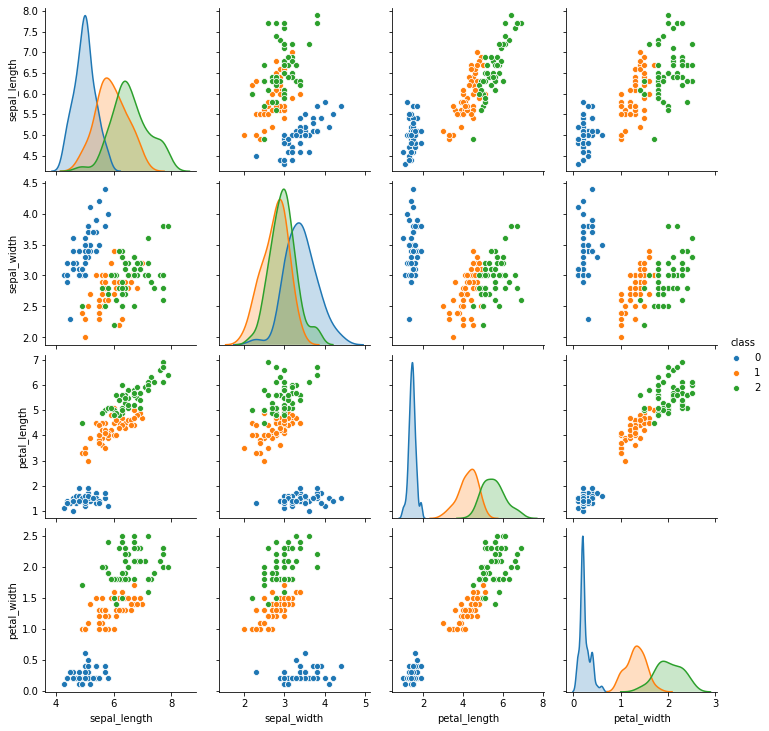

In [34]:
sns.pairplot(df,hue='class');

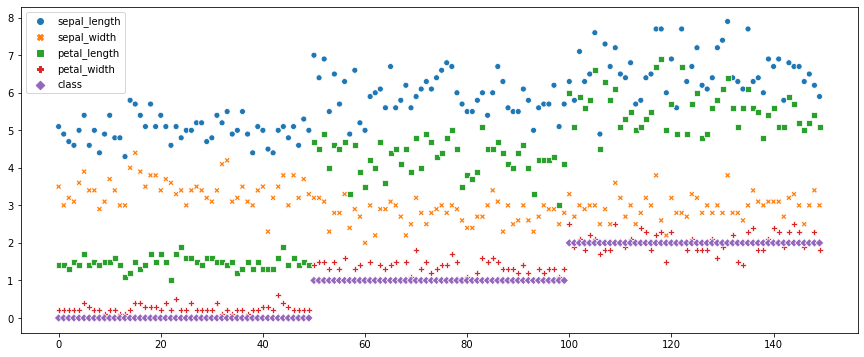

In [35]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df);

 By using Boxplot method we can analyse about the Outliers.

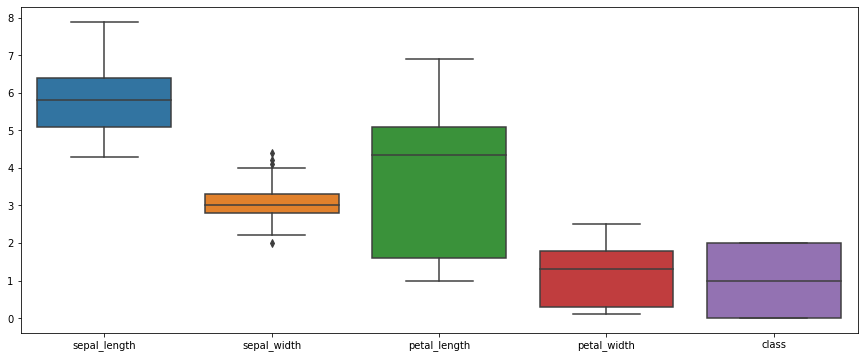

In [36]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df);

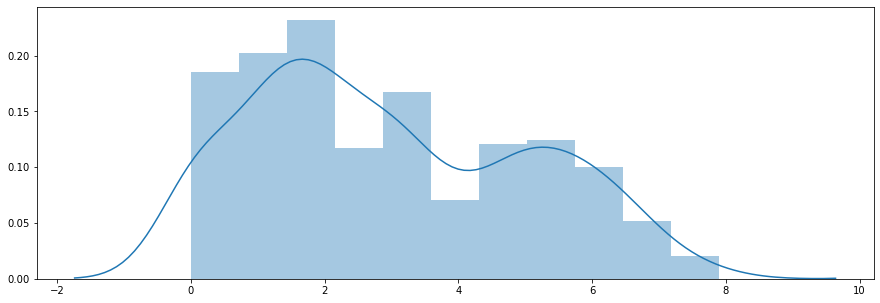

In [37]:
plt.figure(figsize=(15,5))
sns.distplot(df);


# Elbow Method to find the cluster

In [39]:
x=df
k=[1,2,3,4,5,6,7,8,9]
ssd=[]       # sum of squared distance
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(x)
    ssd.append(model.inertia_)

Text(0, 0.5, 'ssd Sum of Squared distance')

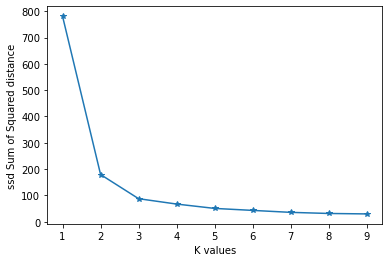

In [40]:
plt.plot(k,ssd,marker='*')
plt.xticks(k)
plt.xlabel('K values')
plt.ylabel('ssd Sum of Squared distance')

### here we select k=4 

In [41]:
model=KMeans(n_clusters=4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
model.fit(x)
y_kmeans=model.predict(x)
print(model.inertia_)
print(model.labels_)

66.9079888888889
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 0 3 3 0 2 0 3 0 3
 3 3 3 3 3 3 0 0 3 0 3 0 3 3 0 3 3 3 0 0 0 3 3 3 0 3 3 3 3 3 3 3 0 3 3 3 3
 3 3]


In [43]:
# Here we define variables for labels and centroid for storing the data

labels = model.labels_
centroid = model.cluster_centers_

In [44]:
x=np.array(x)

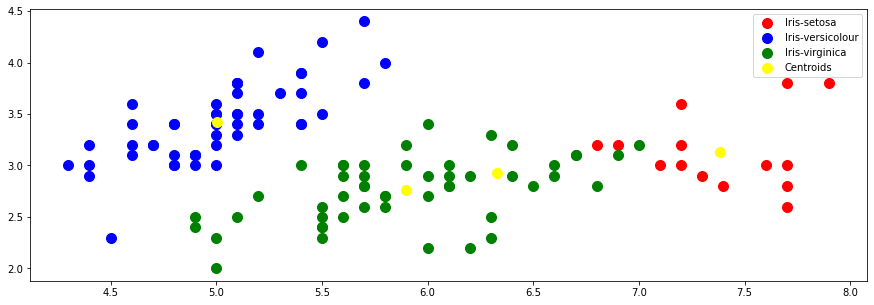

In [45]:
plt.figure(figsize=(15,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

# CONCLUSION

### We successfully completed the task which is predict the optimum number of clusters and represent it visually using Unsupervised learning. 
* Here we can see yellow dot is represent the centroid, 
* red color dotted represnt the 'Iris-setosa' feature ,
* blue dot represents the 'Iris-versicolour' and 
* green dot represents the 'Iris-virginica'.

## Thankyou